In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Classroom/[Genap 20 21] - IN276 - Kelas A Pencarian Informasi Media Online, Selasa pkl. 15.00 - 17.30/UTS/freq_kata.csv')

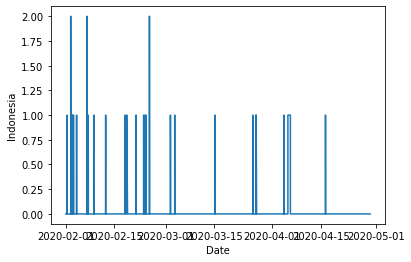

In [20]:
from matplotlib import pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Classroom/[Genap 20 21] - IN276 - Kelas A Pencarian Informasi Media Online, Selasa pkl. 15.00 - 17.30/UTS/freq_kata.csv', parse_dates = ['created_at'], index_col = ['created_at'])
df.drop(df.columns[0], axis=1, inplace=True)
plt.xlabel('Date')
plt.ylabel('Indonesia')
plt.plot(df)

In [21]:
df.index = df.index.to_period('D')
df.head()

,indonesia
created_at,
2020-02-01,0
2020-02-01,0
2020-02-01,0
2020-02-01,0
2020-02-01,0


In [22]:
df = df.groupby('created_at').sum()
df.head()

,indonesia
created_at,
2020-02-01,1
2020-02-02,5
2020-02-03,1
2020-02-04,1
2020-02-05,0


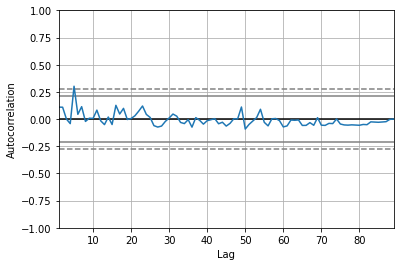

In [23]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

Lag = 10

In [9]:
!pip install statsmodels

In [24]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(df, order=(10,1,0))
model_fit = model.fit()

In [25]:
# summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.indonesia   No. Observations:                   88
Model:                ARIMA(10, 1, 0)   Log Likelihood                -116.413
Method:                       css-mle   S.D. of innovations              0.893
Date:                Fri, 16 Apr 2021   AIC                            256.826
Time:                        07:19:53   BIC                            286.554
Sample:                    02-02-2020   HQIC                           268.803
                         - 04-29-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0206      0.016     -1.275      0.206      -0.052       0.011
ar.L1.D.indonesia     -0.8592      0.105     -8.200      0.000      -1.065      -0.654
ar.L2.D.indonesia   

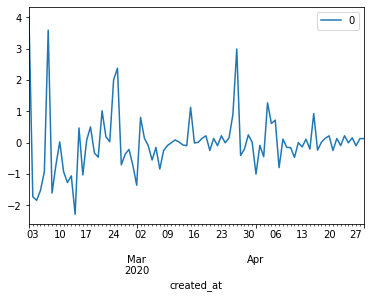

In [26]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

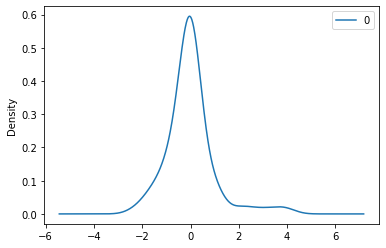

In [27]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [28]:
# summary stats of residuals
print(residuals.describe())

               0
count  88.000000
mean   -0.001524
std     0.990714
min    -2.284828
25%    -0.382103
50%    -0.010335
75%     0.151152
max     4.020650


# Forecasting Timeseries

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

Merah = predictions
Biru = expected value

predicted=-0.126859, expected=1.000000
predicted=0.030229, expected=5.000000
predicted=1.168826, expected=1.000000
predicted=0.733044, expected=1.000000
predicted=0.168202, expected=0.000000
predicted=0.038202, expected=0.000000
predicted=1.754701, expected=6.000000
predicted=1.787047, expected=0.000000
predicted=1.777285, expected=2.000000
predicted=0.162356, expected=0.000000
predicted=0.324295, expected=0.000000
predicted=3.398614, expected=1.000000
predicted=0.823304, expected=0.000000
predicted=2.302450, expected=0.000000
predicted=-0.024413, expected=0.000000
predicted=0.897415, expected=0.000000
predicted=-0.399165, expected=0.000000
predicted=1.212958, expected=2.000000
predicted=0.059063, expected=0.000000
predicted=0.773379, expected=0.000000
predicted=0.026856, expected=1.000000
predicted=-0.147679, expected=0.000000
predicted=1.384983, expected=1.000000
predicted=0.030700, expected=2.000000
predicted=0.491974, expected=3.000000
predicted=1.369002, expected=0.000000
predicte

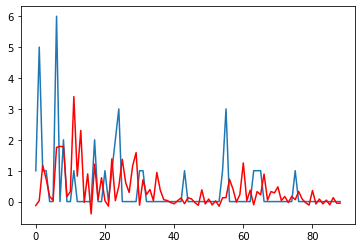

In [30]:
# split into train and test sets
X = df.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
train, test = X, X
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()